### **Data Preprocessing**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [35]:
main_df=pd.read_csv('advertising.csv')

In [36]:
main_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [37]:
main_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [38]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


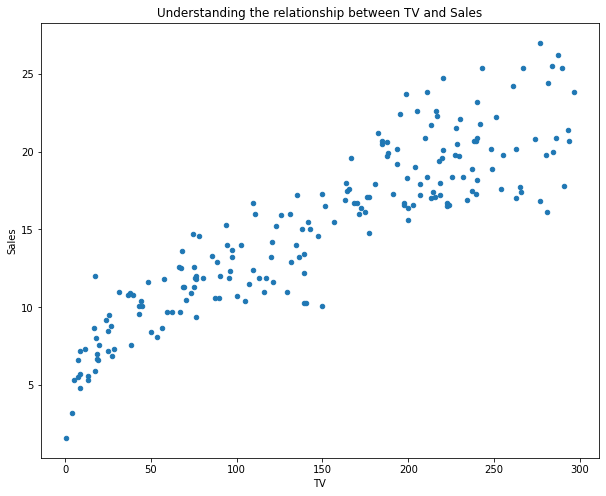

In [39]:
#fig, axs = plt.subplots(1, , sharey=True)
main_df.plot(kind='scatter', x='TV', y='Sales', figsize=(10, 8))
plt.title("Understanding the relationship between TV and Sales")
plt.show()

#### **ASSUMPTIONS MADE AFTER OBSERVING THIS SCATTER PLOT OF THE RELATIONSHIP B/W TV AND SALES**
1. FORM OF RELATIONSHIP: LINEAR
2. DIRECTION : POSITIVE
3. STRENGTH : STRONG
4. OUTLIERS : FEW/NONE

### **Linear Regression**
Simple Linear regression is a method for predicting a quantitative response using a single feature. The mathematical equation is:

y=β0+β1x 


y  is the response or the target variable
x  is the feature
β1  is the coefficient of x
β0  is the intercept
β0  and  β1  are the model coefficients. To create a model, we must "learn" the values of these coefficients. These values will help us predict Sales.

### **Estimating ("Learning") Model Coefficients**

The general equation of a straight line is:

 y=mx+b 

While we are predicting values of y ffor each x, the calculations finally obtain a single straight line.

##### **From the observed relationship in the scatter plot, now we propose a Linear Regression model b/w the TV and Sales**

In [40]:
X=main_df[['TV']]
Y=main_df[['Sales']]

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20)

In [42]:
x_test.describe()

,TV
count,40.00000
mean,145.67500
std,88.23332
min,4.10000
25%,73.62500
50%,137.85000
75%,217.67500
max,296.40000


In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_pred=lm.predict(x_test)
y_pred

array([[22.48000777],
       [14.50089297],
       [ 7.90704116],
       [ 7.43605175],
       [17.90309886],
       [13.08792473],
       [20.25804594],
       [21.64884998],
       [19.67069443],
       [16.4458022 ],
       [17.78119572],
       [14.68374769],
       [13.63094782],
       [12.35650587],
       [12.90507001],
       [19.81476178],
       [13.61432466],
       [21.10582689],
       [18.31313671],
       [19.16091766],
       [ 7.6022833 ],
       [17.68699784],
       [18.26326724],
       [18.94481663],
       [14.25154563],
       [13.91908252],
       [22.7071909 ],
       [ 8.37248952],
       [ 7.18116336],
       [10.78838817],
       [15.63126757],
       [23.37765818],
       [12.25676694],
       [19.17199976],
       [ 8.04002641],
       [18.96698084],
       [11.11531023],
       [ 9.91844302],
       [10.77730607],
       [ 7.35847702]])

#### **Calculation of Metrics**

In [45]:
from sklearn import metrics
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MSE 5.548778140648599
MAE 1.8362745885689997
RMSE 2.3555844583985093


In [46]:
print(lm.intercept_)
print(lm.coef_)

[6.95398023]
[[0.05541052]]


#### **Testing for new values**

In [47]:
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [48]:
new_x=50
new_x=np.array(new_x)

In [49]:
preds = lm.predict(X_new)
preds

array([[9.7245062]])

#### **Scatter plot for new data**

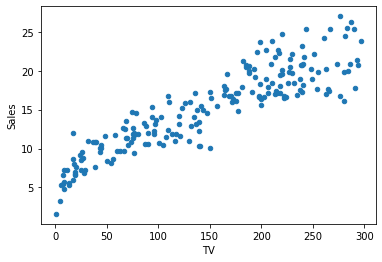

In [50]:
main_df.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

### **Interpreting the model**

---



An **increase** in a unit of TV ad expenditure is associated with **increase** in Sales.
The coefficient **β1=0.05565007** denotes that for an increased expense on a TV ad of $1000 the Sales would go up by 55.65007


β1 is negative as it has an inverse relationship with increase in TV ads(coeff), ie.: an increase in TV ads would decrease β1 making it thus **negative**.




### **Model Confidence**

---



Linear Regression is a **high bias** and **low variance** model because the best fit line remains in the same position, roughly after repeated sampling also, thus **low variance**. But due to **high bias**, repeated samples will **not** give a perfect relationship. Low variance thus helps us only when the training data set is large.

95% confidence of model means: If the population from which this sample is drawn and is sampled 100 times, then approximately 95 (out of 100) of those confidence intervals shall contain the "true" coefficients.

#### **Constructing Confidence Intervals for fitted parameters**
The confidence interval is based on the standard normal distribution.

In [51]:
import numpy as np
import scipy.stats

In [52]:

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [53]:
mean,lower,upper = mean_confidence_interval(X,0.95)

In [54]:
mean,lower,upper

(147.0425, array([135.07112399]), array([159.01387601]))

#### **Calculation of Prediction Interval**

In [55]:
from numpy import power
from numpy import sqrt
from numpy import mean
from numpy import std
from numpy import sum as arraysum
from scipy.stats import linregress
from matplotlib import pyplot

In [56]:
df_x=main_df['TV']
df_y=main_df['Sales']

In [57]:
b1, b0, r_value, p_value, std_err = linregress(df_x, df_y)
# make predictions

In [58]:
yhat = b0 + b1 * df_x

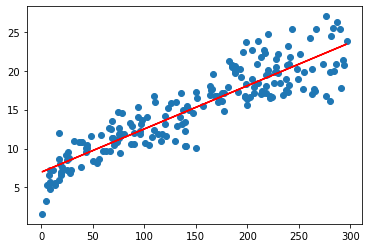

In [59]:
plt.scatter(df_x, df_y)
plt.plot(df_x, yhat, color='r')
plt.show()

In [60]:
x_in = np.mean(df_x)
y_out = np.mean(df_y)
yhat_out = np.mean(yhat)

In [61]:
sum_errs = arraysum((df_y - yhat)**2)
stdev = sqrt(1/(len(df_y)-2) * sum_errs)
# calculate prediction interval
interval = 1.96 * stdev

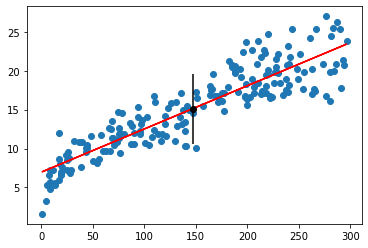

In [62]:
plt.scatter(df_x,df_y)
plt.plot(df_x, yhat, color='red')
plt.errorbar(x_in, yhat_out, yerr=interval, color='black', fmt='o')
plt.show()

In [63]:
lower,upper = yhat_out-interval,yhat_out+interval
print('Prediction Interval : %3f'% interval)
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
print('True value: %.3f' % y_out)

Prediction Interval : 4.499662
95% likelihood that the true value is between 10.631 and 19.630
True value: 15.131


#### **The black dot on the best-fit line shows the true value among the predicted values. The black bar passing through the black dot represents the Prediction Interval of the model**

In [64]:
import seaborn as sns

**Uncertainty about the estimate by giving a range within which "true" coefficients exist.**

95% confidence intervals is default. We can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider).

### **Hypothesis Testing and p-values**

---


Hypothesis testing is related to confidence intervals. We start with a null hypothesis and an alternate hypothesis. Then, we check whether the data **rejects** the **null hypothesis** or **fails** to reject it ( not necessarily meaning to "**accept**" the null hypothesis).

**Null hypothesis**: No relationship exists between TV advertisements and Sales (and hence  β1  equals zero).

**Alternative hypothesis**: There exists a relationship between TV advertisements and Sales (and hence,  β1  is not equal to zero).

#### The coefficients are estimated using the least-squares criterion, which will happen when, the best fit line will calculate the sum of squared errors and minimize it.

In [66]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [67]:
model0 = sm.OLS(df_y,df_x)
results=model0.fit()
print("Parameters:",results.params)
print("R2 : " ,results.rsquared)
print("P-value : ", results.pvalues)

Parameters: TV    0.090884
dtype: float64
R2 :  0.9316754914300287
P-value :  TV    6.420084e-118
dtype: float64


#### **Since there exists a small p-value this signifies that a relationship between TV and Sales exists. Smaller the p-value, the stronger the evidence that we must reject the null hypothesis.**

### **R-squared**

---


One of the most generic way to evaluate the fit of a linear model is by computing the R-squared value. R-squared explains theproportion of variance, i.e., the proportion of variance in the observed data which the model explains, or the reduction in error over the null model. (A null model only predicts the mean of all the observed responses, and thus it only has an intercept and no slope.)



In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(df_y, yhat)

The value of R-squared lies between 0 and 1. A value closer to 1 is better as it means that more variance is explained by the model.

### **Analysis Of Variance (Anova) Testing**

---


##### **NULL hypothesis** : There is no difference in the means of different groups
##### **Alternate hypothesis** : Mean of the different groups of the data has a high variance and are not all equal

In [ ]:
import scipy.stats as stats

In [ ]:
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(main_df['TV'],main_df['Sales'])
print(fvalue, pvalue)

#### **Since a high F-value is observed we can conclude, NULL hypothesis is rejected and it is concluded that the variability of group means is large relative to the within group variability**

### **Discussion and Conclusions**

---
#### From the entire analysis of our linear regression model, we can conclusively draw a few points which are as follows.
#### The assumptions we made from the scatter plot initially, highlighted a few points about **no outliers**, relationship between variables is **linear**, the strength is **strong** which means all the data points are near to the best-fit line and that the direction of the relationship is **positive**, were proved to be true after we carried out **Linear Regression** on our model.
#### **Interpretations** from the output of our regression model suggests that the amount of increase or say β1 has a negative impact on TV ad, ie: as β1 goes up, increase in TV ads go down.
#### After which we calculated the **Model Confidence** which helped us to understand the importance of low variance and high bias of a linear regression model better.
#### We calculated **Confidence intervals** on the mean response by calculating the mean of entire data(TV and Sales) helps us to understand that we can say with 95% certainty that this range of values contains true mean of population.
#### **Prediction Intervals** calculation helped us to interpret where in the range of intervals would maximum of our true(as to be predicted) values lie.
#### **Hypothesis Testing** is conducted in which we consider a null hypothesis(where a relationship exists b/w TV and Sales) and an alternate hypothesis(where there exists no relationship b/w TV and sales).
##### A small p-value for the intercept and the slope indicates that we can **reject the null hypothesis** which allows us to conclude that there **exists** a relationship between TV and Sales.
#### **Anova Testing** is conducted to find out the kind of relationship existing b/w TV and Sales. We obtain a high **F-value** which shows a case where the variability of group means is largely relative to the within group variability. In order to reject the null hypothesis that the group means are equal, we need a high F-value.
#### **R-squared** calculated lastly shows that the closer the value of R-squared is to 1 the better the model fits our data. If R-squared comes below 0(which is a possibility) that means the model is so bad that it is performing even worse than the average best-fit line. 

#### **Finally our model fits our data best as the R-squared value suggests, since we obtain a value closer to 1 (0.81)**.



